<a href="https://colab.research.google.com/github/Deskola/Deep-Learning-Projects/blob/master/CreatingImageClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Creating my own dataset from Google Images**

In this tutorials we will see how to easily create an image dataset through Google Image. N/B You will have to repeate these steps for any new category you want to Google(e.g once for dogs and once for cats)

## **Get a list of URLs**

Go to Google Images and search for the images you are interested in. The more specific you are in your Google Search, the better the result and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download or until you see a button that says 'Show more results'. All the imagesypu scrolled past are now available to download. Max is 700

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'teddys'
file = '/content/drive/My Drive/Colab Notebooks/data/textfiles/teddy.txt'

In [0]:
folder = 'black'
file = '/content/drive/My Drive/Colab Notebooks/data/textfiles/black.txt'

In [0]:
folder = 'grizzly'
file = '/content/drive/My Drive/Colab Notebooks/data/textfiles/grizzly.txt'

You will need to run this kine once per each category

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

## **Downloading the Images**

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://www.nationalgeographic.com/content/dam/news/2016/03/04/grizzly_delisting/01grizzlydelisting.jpg HTTPSConnectionPool(host='www.nationalgeographic.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/fT0AAt-iYHX-BpQkSqcsxXyevzU=/1440x0/smart/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/Q453GZ66JEZEZFGRDAJEPKT254.png HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

teddys


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/data/bears/teddys/00000098.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/data/bears/grizzly/00000173.jpg'>
black


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:1044: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/Colab Notebooks/data/bears/black/00000141.jpg'>


## **View Data**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Taking a look at some of the pictures

In [0]:
data.classes

['black', 'grizzly', 'teddys']

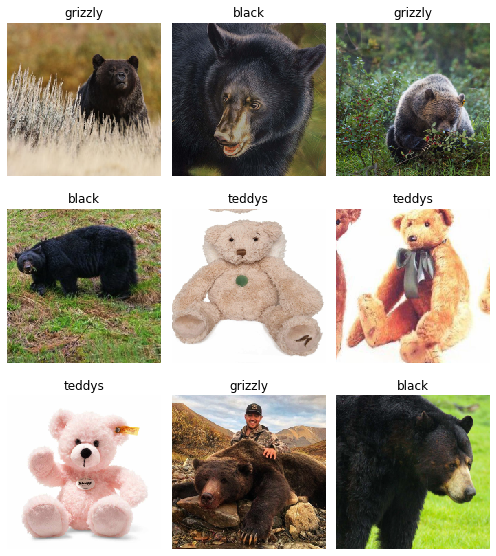

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
#classes, categories, training set, validation set
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 461, 115)

## Training the Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.851993,0.221653,0.052174,00:29
1,0.510189,0.328785,0.043478,00:28
2,0.362115,0.343910,0.034783,00:29
3,0.298411,0.331060,0.034783,00:28


In [0]:
learn.save('/content/drive/My Drive/Colab Notebooks/data/Lesson2stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder complete, type(learner_name).recorder.plot() to see the graph

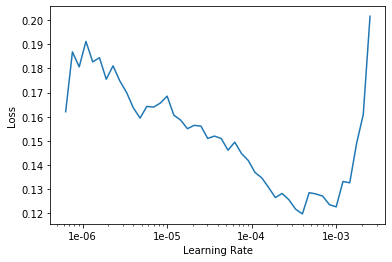

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.112263,0.377199,0.043478,00:29
1,0.079657,0.276201,0.052174,00:29


In [0]:
learn.save('/content/drive/My Drive/Colab Notebooks/data/Lesson2stage-2')

## **Interpretation**

In [0]:
learn.load('/content/drive/My Drive/Colab Notebooks/data/Lesson2stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (461 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Valid: LabelList (115 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,teddys,black,grizzly,grizzly
Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

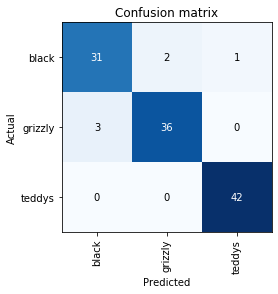

In [0]:
interp.plot_confusion_matrix()

## **Cleaning Up**

Some of our top losses aren't due to bad performance by our model. There are images in our dataset that should not be. Using the FileDeleter widget from fastai.widgets, we can prune out top losses, by removing photos that don't belong. First we need to get the fle paths from our top_losses. Here's a handy function that pulls out all our tp_losses

In [0]:
from fastai.widgets import *

In [0]:
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to cour widget

In [0]:
fd = ImageCleaner(fns_idxs=idxs,path=top_loss_paths)

TypeError: ignored

## **Putting your model in production**

In [0]:
data.classes

['black', 'grizzly', 'teddys']

You probably want to use CPU for inference except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically> you can test your model on CPU like so

In [0]:
#fastai.defaults.device = tarch.device("CPU")

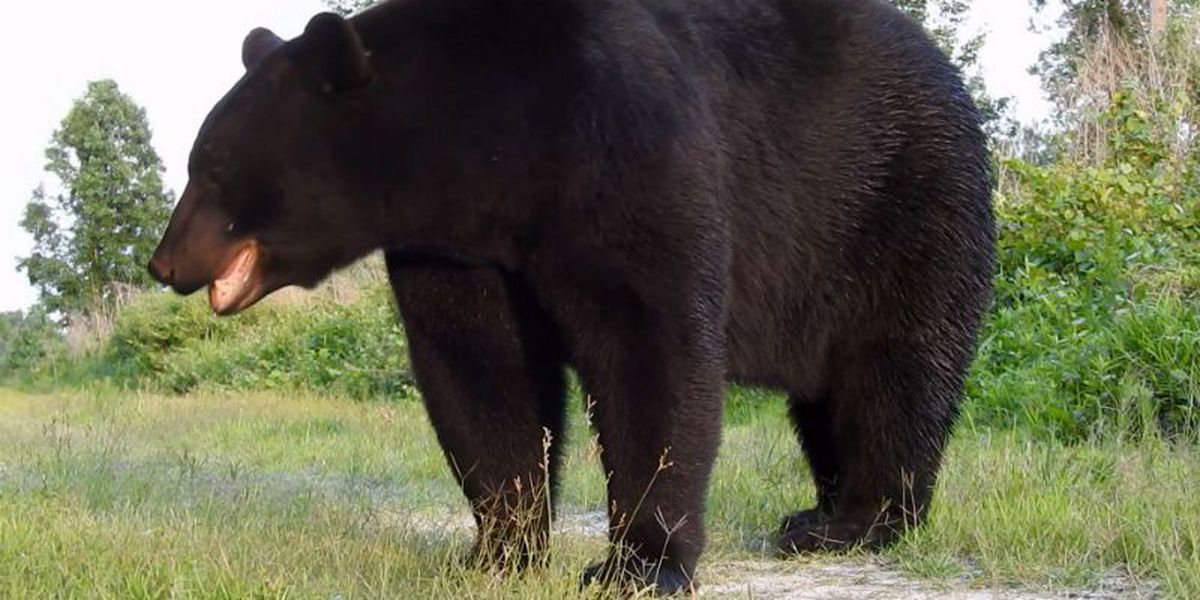

In [0]:
img = open_image(path/'black'/'00000000.jpg')
img

In [0]:
#this loads when the web app is up 
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)
learn = cnn_learner(data2,models.resnet34)
learn.load('/content/drive/My Drive/Colab Notebooks/data/Lesson2stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/Colab Notebooks/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black

In [0]:
#saving model using pickles
pickle.dump(learn, open('/content/drive/My Drive/Colab Notebooks/data/ImageClassifier.pkl','wb'))

Code for using it in a web app

In [0]:
# @app.route('/',methods=['GET'])
# async def classifier_url(request):
#   bytes = await get_bytes(request.Query_params["url"])
#   img = open_image(BytesIO(byte))
#   _,_,losses = learn.predict(img)
#   return JSONResponse({
#       "Predictions": sorted(
#           zip(cat_learner.data.classes, map(float, losses)),
#           key=lambda p: p[1]
#           reverse=True
#       )
#   })


## **Things that can go wrong**



* Most of the time things will train   fine with the defaults
* There is not much you really need to tune (despite what you've heard)
* Most likely are
  *   Learning rate
  *   Number of espochs










Leaning rate (LR) too high